In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_16524/2576823575.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
def buildandTrainTheModel(x, y):
    
    ANNreg = nn.Sequential(
        nn.Linear(1, 1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr = .05)
    
    # Train the model
    numepochs = 500
    losses = torch.zeros(numepochs)
    
    for epochi in range(numepochs):
        
        # forward pass
        yHat = ANNreg(x)
        
        #compute loss
        loss = lossfun(yHat, y)
        losses[epochi] = loss
        
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = ANNreg(x)
    return predictions, losses

In [3]:
def createTheData(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N,1)/2
    return x, y

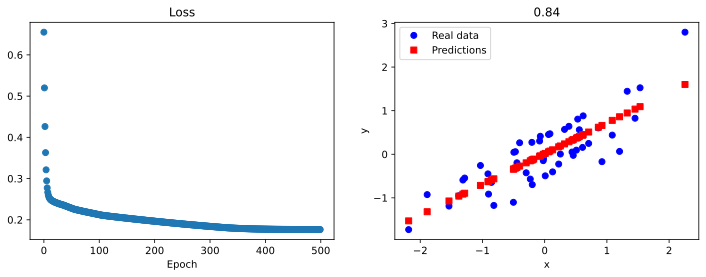

In [12]:
x, y = createTheData(0.8)

# run the model
yHat, losses = buildandTrainTheModel(x, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(losses.detach(), 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label = 'Real data')
ax[1].plot(x, yHat.detach(), 'rs', label = 'Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'{np.corrcoef(y.T, yHat.detach().T)[0, 1]:.2f}')
ax[1].legend()

plt.show()